In [1]:
from sklearn import tree
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline




In [2]:
from IPython.display import SVG
from graphviz import Source
from IPython.display import display
from IPython.display import HTML
style = "<style>{width:50% !important; height:10% !important;}</style>"
HTML(style)

In [3]:
import os
os.environ["PATH"] += os.pathsep + 'C:/Anaconda3/Library/bin/graphviz'# (укажите свой путь до bin для graphviz)

In [4]:
titanic_data = pd.read_csv("train.csv")
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
titanic_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [18]:
X = titanic_data.drop(['PassengerId','Survived','Name', 'Ticket', 'Cabin'], axis=1)
y = titanic_data.Survived
X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,22.0,1,0,7.2500,S
1,1,female,38.0,1,0,71.2833,C
2,3,female,26.0,0,0,7.9250,S
3,1,female,35.0,1,0,53.1000,S
4,3,male,35.0,0,0,8.0500,S


In [20]:
X = pd.get_dummies(X)
X.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,22.0,1,0,7.2500,0,1,0,0,1
1,1,38.0,1,0,71.2833,1,0,1,0,0
2,3,26.0,0,0,7.9250,1,0,0,0,1
3,1,35.0,1,0,53.1000,1,0,0,0,1
4,3,35.0,0,0,8.0500,0,1,0,0,1


In [8]:
X = X.fillna({'Age': X.Age.median()})

In [9]:
X.isnull().sum()

Pclass        0
Age           0
SibSp         0
Parch         0
Fare          0
Sex_female    0
Sex_male      0
Embarked_C    0
Embarked_Q    0
Embarked_S    0
dtype: int64

In [10]:
clf = tree.DecisionTreeClassifier(criterion='entropy')

In [11]:
clf.fit(X,y)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

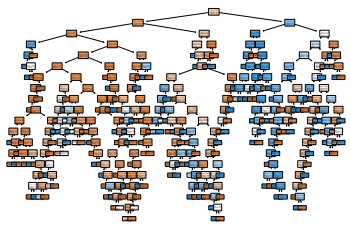

In [16]:
# import sklearn
# graph = Source(tree.export_graphviz(clf, out_file=None,
#                                    feature_names=list(X),
#                                    class_names=['Died','Positive'],
#                                    filled = True))
# display(SVG(graph.pipe(format='svg')))

clf = tree.DecisionTreeClassifier(criterion='entropy')

clf.fit(X, y)

tree.plot_tree(clf, rounded=True, filled=True);

#### решение проблемы переобучения - ограничение глубины дерева или использование двух выборок

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test =  train_test_split(X, y, test_size=0.33, random_state=42)

In [ ]:
X_train.shape

In [ ]:
X_test.shape

In [ ]:
clf.score(X, y)

In [ ]:
clf.fit(X_train, y_train)

In [ ]:
clf.score(X_train, y_train)

In [ ]:
clf.score(X_test, y_test)

большая разница в значениях говорит об overfitting

ограничим глубину дерева:

In [ ]:
clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [ ]:
clf.fit(X_train, y_train)

In [ ]:
clf.score(X_train, y_train)

In [ ]:
clf.score(X_test, y_test)

### эффективный подбор параметров

In [74]:
max_depth_values = range(1, 100)

In [75]:
scores_data = pd.DataFrame()

In [76]:
for max_depth in max_depth_values:
    clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=max_depth)
    clf.fit(X_train, y_train)
    train_score = clf.score(X_train, y_train)
    test_score = clf.score(X_test, y_test)
    
    temp_score_data = pd.DataFrame({'max_depth': [max_depth],
                                    'train_score': [train_score],
                                    'test_score': [test_score]})
    scores_data = scores_data.append(temp_score_data)

In [77]:
scores_data.head()

,max_depth,train_score,test_score
0,1,0.781879,0.796610
0,2,0.805369,0.776271
0,3,0.823826,0.820339
0,4,0.833893,0.823729
0,5,0.840604,0.806780


https://pandas.pydata.org/pandas-docs/version/0.23.4/generated/pandas.melt.html

In [78]:
scores_data_long = pd.melt(scores_data, id_vars=['max_depth'], value_vars=['train_score', 'test_score'],
                          var_name='set_type', value_name='score')

In [79]:
scores_data_long.head()

,max_depth,set_type,score
0,1,train_score,0.781879
1,2,train_score,0.805369
2,3,train_score,0.823826
3,4,train_score,0.833893
4,5,train_score,0.840604


https://stackoverflow.com/questions/51422146/install-the-latest-version-of-seaborn-0-9-0-through-pip

 pip3 install seaborn==0.9.0

In [49]:
import seaborn

In [52]:
seaborn.__version__

'0.9.0'

https://seaborn.pydata.org/generated/seaborn.lineplot.html

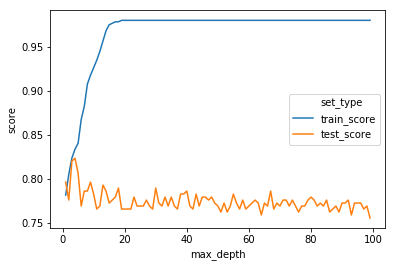

In [54]:
sns.lineplot(x="max_depth", y="score", hue="set_type", data=scores_data_long)

#### анализ графика:
- с увеличеним глубины дерева растет точность классификации на тренировочной выборке
- но это не всегда ведет к нахождению общих закономерностей исследуемых данных
- test score изначально невелик(модель ещ ене доучилась), на промежутке 3-5 score максимален(оптимальное состояние: закономерность с изученных данных переносится на новые), но в дальнейшем с увеличеним train score начинает падать test score(переход от недообученности к переобученности)

https://scikit-learn.org/stable/modules/cross_validation.html

обучение на нескольких подвыборках выборках:

In [129]:
from sklearn.model_selection import cross_val_score

In [130]:
clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [131]:
cross_val_score(clf, X_train, y_train , cv=5)

array([0.76666667, 0.80833333, 0.78991597, 0.74789916, 0.80508475])

In [132]:
cross_val_score(clf, X_train, y_train , cv=5).mean()

0.7835799743626264

In [136]:
    scores_data = pd.DataFrame()

In [137]:
for max_depth in max_depth_values:
    clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=max_depth)
    clf.fit(X_train, y_train)
    train_score = clf.score(X_train, y_train)
    test_score = clf.score(X_test, y_test)
    
    mean_cross_val_score = cross_val_score(clf, X_train, y_train , cv=5).mean()
    
    temp_score_data = pd.DataFrame({'max_depth': [max_depth],
                                    'train_score': [train_score],
                                    'test_score': [test_score],
                                    'cross_val_score': [mean_cross_val_score]})
    scores_data = scores_data.append(temp_score_data)

In [138]:
scores_data.head()

,max_depth,train_score,test_score,cross_val_score
0,1,0.781879,0.796610,0.781857
0,2,0.805369,0.776271,0.768553
0,3,0.823826,0.820339,0.788678
0,4,0.833893,0.823729,0.783580
0,5,0.840604,0.810169,0.796942


In [139]:
scores_data_long = pd.melt(scores_data, id_vars=['max_depth'], value_vars=['train_score', 'test_score', 'cross_val_score'],
                          var_name='set_type', value_name='score')

In [140]:
scores_data_long.head()

,max_depth,set_type,score
0,1,train_score,0.781879
1,2,train_score,0.805369
2,3,train_score,0.823826
3,4,train_score,0.833893
4,5,train_score,0.840604


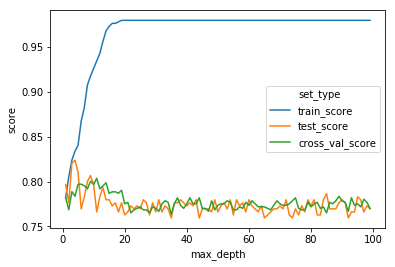

In [141]:
sns.lineplot(x="max_depth", y="score", hue="set_type", data=scores_data_long)

максимальная точность достигается при большей глубине дерева, чем 3-5

cross_val_score более устойчив к переобучению

найдем дерево с максимальным значением cross_val_score

In [144]:
scores_data_long.query("set_type == 'cross_val_score'").head(20)

,max_depth,set_type,score
198,1,cross_val_score,0.781857
199,2,cross_val_score,0.768553
200,3,cross_val_score,0.788678
201,4,cross_val_score,0.783580
202,5,cross_val_score,0.796942
203,6,cross_val_score,0.797083
204,7,cross_val_score,0.795317
205,8,cross_val_score,0.791885
206,9,cross_val_score,0.800274
207,10,cross_val_score,0.796885


5	cross_val_score	0.800303

In [146]:
best_clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=11)

In [148]:
cross_val_score(best_clf, X_test, y_test , cv=5).mean()

0.7864406779661017


# Последнее задание котики

In [2]:
import pandas as pd
df_cats=pd.read_csv('dogs_n_cats.csv')
df_cats.head()
df_cats.query('Длина<=14.5').head()
df_cats['a']=[1,2,3]
df_cats

ValueError: Length of values does not match length of index

In [43]:
df_cats.isnull().sum()

Длина                 0
Высота                0
Шерстист              0
Гавкает               0
Лазает по деревьям    0
Вид                   0
dtype: int64

In [82]:
import json
f=open('dataset_209691_15 (4).txt','r')
dataset=f.read()
df_predict=pd.DataFrame(json.loads(dataset))
df_predict.head(3)

,Длина,Высота,Шерстист,Гавкает,Лазает по деревьям
0,26,31.2,1,1,0
1,33,39.6,1,1,0
10,25,30.0,1,0,0


In [75]:
X_train=df_cats.drop(['Вид'],axis=1)
Y_train=df_cats['Вид']
X_train.head()

,Длина,Высота,Шерстист,Гавкает,Лазает по деревьям
0,15,18.0,1,1,0
1,20,24.0,1,0,0
2,34,40.8,1,1,0
3,26,31.2,1,1,0
4,16,19.2,1,1,0


In [76]:
clf = tree.DecisionTreeClassifier(criterion='entropy')

In [77]:
clf.fit(X_train,Y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

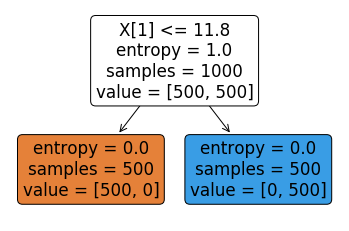

In [78]:
tree.plot_tree(clf, rounded=True, filled=True);

In [83]:
array_predict=clf.predict(df_predict) 

In [84]:
import numpy as np
unique, counts = np.unique(array_predict, return_counts=True)
dict(zip(unique, counts))

{'котик': 43, 'собачка': 57}

In [81]:
np.unique(array_predict,return_counts=True)

(array(['котик', 'собачка'], dtype=object), array([49, 51], dtype=int64))

In [86]:
list(array_predict).count('собачка')

57

In [ ]:
##train['Вид'].replace(['собачка','котик'],[1,0],inplace=True)